This strategy did not yield positive net returns.

In [46]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis to avoid look-ahead bias.

strat_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

## Load And Structure Data

In [48]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [3]:
# data_freq = '1d'
data_freq='4h'

# look_back_window_size = 30
look_back_window_size = 30 * 6

# look_back_min_periods = 10
look_back_min_periods = 10 * 6

# start_datetime = '2020-01-01'
start_datetime = '2020-01-01 00:00:00'

# in_sample_end = pd.to_datetime("2022-12-31")
in_sample_end = pd.to_datetime("2022-12-31 20:00:00")

# out_sample_start = pd.to_datetime("2023-01-01")
out_sample_start = pd.to_datetime("2023-01-01 00:00:00")

yearly_periods = 365 * 6

px_data = get_price_data_for_universe(data_freq, start_datetime)

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [4]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close)
px_close.index.rename("date", inplace=True)
px_close = px_close.astype(float)

px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,104829.35,3312.50,3.10390,426.00,118.79,0.7987,679.4000,0.43040,NaN,0.96990,...,0.4693,0.1678,0.5330,0.03843,0.03902,0.05315,NaN,0.667,6.310,253.65
2025-01-25 00:00:00,105242.44,3317.68,3.13090,442.90,123.82,0.7987,683.7100,0.43400,NaN,0.98640,...,0.4783,0.1671,0.5449,0.03839,0.03903,0.05315,NaN,0.667,6.366,252.74
2025-01-25 04:00:00,104329.56,3289.66,3.10680,436.80,121.12,0.7987,681.3500,0.42830,NaN,0.97670,...,0.4718,0.1671,0.5425,0.03839,0.03903,0.05520,NaN,0.667,6.287,247.29


In [5]:
px_close_in_sample = px_close.loc[:in_sample_end]
px_close_out_sample = px_close.loc[out_sample_start:]
px_close_out_sample

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,16521.36,1194.19,NaN,96.55,69.49,0.8610,245.1529,0.07100,0.05476,0.24522,...,0.2947,0.1860,0.1986,NaN,0.04160,NaN,1.0003,0.375,4.290,9.9549
2023-01-01 04:00:00,16528.14,1195.32,NaN,96.55,69.40,0.8550,243.9536,0.07113,0.05453,0.24514,...,0.2925,0.1860,0.1994,NaN,0.04160,NaN,1.0003,0.362,4.310,9.7805
2023-01-01 08:00:00,16550.51,1196.17,NaN,96.55,70.20,0.8550,244.2534,0.07177,0.05451,0.24586,...,0.2942,0.1860,0.2000,NaN,0.04170,NaN,1.0006,0.359,4.330,9.9404
2023-01-01 12:00:00,16557.02,1196.59,NaN,96.55,70.30,0.8550,244.3091,0.07176,0.05477,0.24610,...,0.2942,0.1883,0.1998,NaN,0.04180,NaN,1.0006,0.359,4.330,9.8688
2023-01-01 16:00:00,16599.38,1201.98,NaN,97.15,70.88,0.8750,245.0832,0.07220,0.05498,0.24852,...,0.2987,0.1892,0.2010,NaN,0.04200,NaN,1.0006,0.383,4.380,9.9382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,104829.35,3312.50,3.1039,426.00,118.79,0.7987,679.4000,0.43040,NaN,0.96990,...,0.4693,0.1678,0.5330,0.03843,0.03902,0.05315,NaN,0.667,6.310,253.6500
2025-01-25 00:00:00,105242.44,3317.68,3.1309,442.90,123.82,0.7987,683.7100,0.43400,NaN,0.98640,...,0.4783,0.1671,0.5449,0.03839,0.03903,0.05315,NaN,0.667,6.366,252.7400
2025-01-25 04:00:00,104329.56,3289.66,3.1068,436.80,121.12,0.7987,681.3500,0.42830,NaN,0.97670,...,0.4718,0.1671,0.5425,0.03839,0.03903,0.05520,NaN,0.667,6.287,247.2900


## Pick Triples Of Correlated Coins

In [6]:
from collections import defaultdict

def get_high_corr_map(px_close_in_sample):
    corr_matrix = px_close_in_sample.corr()
    high_corr_map = defaultdict(list)

    for coin_a in corr_matrix.index:
        for coin_b in corr_matrix.index:
            if coin_a < coin_b and corr_matrix.loc[coin_a, coin_b] > 0.9:
                high_corr_map[coin_a].append((coin_b, corr_matrix.loc[coin_a, coin_b]))
                high_corr_map[coin_b].append((coin_a, corr_matrix.loc[coin_b, coin_a]))

    return corr_matrix, high_corr_map

corr_matrix, high_corr_map = get_high_corr_map(px_close_in_sample)
high_corr_map

defaultdict(list,
            {'BTCUSDT': [('EOSUSDT', 0.9357841888003043),
              ('ZECUSDT', 0.9443692767226882),
              ('OMGUSDT', 0.9797421056045555),
              ('LSKUSDT', 0.9172757854334536),
              ('QNTUSDT', 0.9172292164961389),
              ('ENJUSDT', 0.9543867430410237),
              ('MANAUSDT', 0.9504918422636532),
              ('LRCUSDT', 0.9654504850230609),
              ('DOTUSDT', 0.9670314751794978),
              ('ALGOUSDT', 0.9030928194254518),
              ('BNTUSDT', 0.9664078711415602)],
             'EOSUSDT': [('BTCUSDT', 0.9357841888003043),
              ('BCHUSDT', 0.9572469269238592),
              ('ETHUSDT', 0.9678384266699815),
              ('LTCUSDT', 0.9146718426727022),
              ('XLMUSDT', 0.9530431225286259),
              ('LINKUSDT', 0.9339693421829531),
              ('NEOUSDT', 0.9593886117884787),
              ('MKRUSDT', 0.9109195439713003),
              ('ONTUSDT', 0.9677019476087275),
              ('

In [7]:
def get_coins_with_hi_corr_mutual_lo_corr(corr_matrix, high_corr_map):
    coins_with_hi_corr_mutual_lo_corr = []

    for coin in high_corr_map:
        hi_corr_coins = list(map(lambda p: p[0], high_corr_map[coin]))
        for coin_a in hi_corr_coins:
            for coin_b in hi_corr_coins:
                if coin_a < coin_b and corr_matrix.loc[coin_a, coin_b] < 0.9:
                    coins_with_hi_corr_mutual_lo_corr.append((coin, coin_a, coin_b))

    return coins_with_hi_corr_mutual_lo_corr

coins_with_hi_corr_mutual_lo_corr = get_coins_with_hi_corr_mutual_lo_corr(corr_matrix, high_corr_map)
coins_with_hi_corr_mutual_lo_corr

[('BTCUSDT', 'EOSUSDT', 'ZECUSDT'),
 ('BTCUSDT', 'EOSUSDT', 'LSKUSDT'),
 ('BTCUSDT', 'EOSUSDT', 'QNTUSDT'),
 ('BTCUSDT', 'LSKUSDT', 'QNTUSDT'),
 ('BTCUSDT', 'QNTUSDT', 'ZECUSDT'),
 ('BTCUSDT', 'ENJUSDT', 'ZECUSDT'),
 ('BTCUSDT', 'MANAUSDT', 'ZECUSDT'),
 ('BTCUSDT', 'MANAUSDT', 'QNTUSDT'),
 ('BTCUSDT', 'LRCUSDT', 'LSKUSDT'),
 ('BTCUSDT', 'LRCUSDT', 'QNTUSDT'),
 ('BTCUSDT', 'DOTUSDT', 'QNTUSDT'),
 ('BTCUSDT', 'ALGOUSDT', 'ZECUSDT'),
 ('BTCUSDT', 'ALGOUSDT', 'LSKUSDT'),
 ('BTCUSDT', 'ALGOUSDT', 'QNTUSDT'),
 ('BTCUSDT', 'ALGOUSDT', 'BNTUSDT'),
 ('BTCUSDT', 'BNTUSDT', 'EOSUSDT'),
 ('BTCUSDT', 'BNTUSDT', 'OMGUSDT'),
 ('BTCUSDT', 'BNTUSDT', 'ENJUSDT'),
 ('BTCUSDT', 'BNTUSDT', 'MANAUSDT'),
 ('BTCUSDT', 'BNTUSDT', 'LRCUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'ETHUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'LTCUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'XLMUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'LINKUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'NEOUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'MKRUSDT'),
 ('EOSUSDT', 'BTCUSDT', 'ONTUSDT'),
 ('EOSUSDT', 'BTCUSD

In [8]:
def get_max_corr_triple(coins_with_hi_corr_mutual_lo_corr, corr_matrix):
    max_corr_triple = None
    max_corr = -1.0
    for coin_triple in coins_with_hi_corr_mutual_lo_corr:
        corr_a = corr_matrix.loc[coin_triple[0], coin_triple[1]]
        corr_b = corr_matrix.loc[coin_triple[0], coin_triple[2]]
        if max_corr < max(corr_a, corr_b):
            max_corr_triple = coin_triple
            max_corr = max(corr_a, corr_b)
    
    coins_with_hi_corr_mutual_lo_corr.remove(max_corr_triple)
    return max_corr_triple


def get_min_corr_triple(coins_with_hi_corr_mutual_lo_corr, corr_matrix):
    min_corr_triple = None
    min_corr = 1.0
    for coin_triple in coins_with_hi_corr_mutual_lo_corr:
        corr_a = corr_matrix.loc[coin_triple[0], coin_triple[1]]
        corr_b = corr_matrix.loc[coin_triple[0], coin_triple[2]]
        if min_corr > max(corr_a, corr_b):
            min_corr_triple = coin_triple
            min_corr = max(corr_a, corr_b)
    
    coins_with_hi_corr_mutual_lo_corr.remove(min_corr_triple)
    return min_corr_triple

In [9]:
def get_triples_from_hi_corr_data(coins_with_hi_corr_mutual_lo_corr, corr_matrix, use_least_corr):
    coins_in_a_triple = set()
    selected_triples = dict()

    while len(coins_with_hi_corr_mutual_lo_corr) > 0:
        selected_corr_triple = None
        
        if use_least_corr:
            selected_corr_triple = get_min_corr_triple(coins_with_hi_corr_mutual_lo_corr, corr_matrix)
        else:
            selected_corr_triple = get_max_corr_triple(coins_with_hi_corr_mutual_lo_corr, corr_matrix)
        
        for coin in selected_corr_triple:
            if coin in coins_in_a_triple:
                break
        else:
            for coin in selected_corr_triple:
                coins_in_a_triple.add(coin)
            selected_triples[selected_corr_triple[0]] = (selected_corr_triple[1], selected_corr_triple[2])

    return selected_triples

selected_triples = get_triples_from_hi_corr_data(coins_with_hi_corr_mutual_lo_corr, corr_matrix, True)
selected_triples

{'ALGOUSDT': ('BNBUSDT', 'SNXUSDT'),
 'FTMUSDT': ('ONTUSDT', 'ZENUSDT'),
 'DOTUSDT': ('LSKUSDT', 'MATICUSDT'),
 'OMGUSDT': ('ATOMUSDT', 'LTCUSDT'),
 'WAXPUSDT': ('RENUSDT', 'TRXUSDT'),
 'NEOUSDT': ('DGBUSDT', 'XLMUSDT'),
 'LINKUSDT': ('ETHUSDT', 'MKRUSDT'),
 'VETUSDT': ('DOGEUSDT', 'ZECUSDT'),
 'ENJUSDT': ('QNTUSDT', 'THETAUSDT'),
 'EOSUSDT': ('MANAUSDT', 'ZRXUSDT'),
 'LRCUSDT': ('BCHUSDT', 'BTCUSDT')}

In [10]:
len(selected_triples)

11

In [11]:
def get_selected_triples(px_close_in_sample, use_least_corr):
    corr_matrix, high_corr_map = get_high_corr_map(px_close_in_sample)
    coins_with_hi_corr_mutual_lo_corr = get_coins_with_hi_corr_mutual_lo_corr(corr_matrix, high_corr_map)
    return get_triples_from_hi_corr_data(coins_with_hi_corr_mutual_lo_corr, corr_matrix, use_least_corr)

selected_triples = get_selected_triples(px_close_in_sample, True)
selected_triples

{'ALGOUSDT': ('BNBUSDT', 'SNXUSDT'),
 'FTMUSDT': ('ONTUSDT', 'ZENUSDT'),
 'DOTUSDT': ('LSKUSDT', 'MATICUSDT'),
 'OMGUSDT': ('ATOMUSDT', 'LTCUSDT'),
 'WAXPUSDT': ('RENUSDT', 'TRXUSDT'),
 'NEOUSDT': ('DGBUSDT', 'XLMUSDT'),
 'LINKUSDT': ('ETHUSDT', 'MKRUSDT'),
 'VETUSDT': ('DOGEUSDT', 'ZECUSDT'),
 'ENJUSDT': ('QNTUSDT', 'THETAUSDT'),
 'EOSUSDT': ('MANAUSDT', 'ZRXUSDT'),
 'LRCUSDT': ('BCHUSDT', 'BTCUSDT')}

## Determine trailing alpha, beta, and the residuals

In [12]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

# px_ex = px_close[["OMGUSDT", "ATOMUSDT", "ZENUSDT"]]
# px_ex = sm.add_constant(px_ex)

# model = RollingOLS(
#     px_ex["OMGUSDT"], px_ex[["const", "ATOMUSDT", "ZENUSDT"]], window=30, min_nobs=20, expanding=True)


# # rolling_px_ex = px_ex.rolling(window=30, min_periods=1)

# # model = sm.OLS(rolling_px_ex["OMGUSDT"], rolling_px_ex[["ATOMUSDT", "ZENUSDT"]])
# results = model.fit(params_only=True)

def get_triples_rolling_alpha_beta(dependent_coin, independent_coin_1, independent_coin_2,
                                   interval, min_num_observations, px_close):
    px_ex = px_close[[dependent_coin, independent_coin_1, independent_coin_2]][:]
    px_ex = sm.add_constant(px_ex)

    model = RollingOLS(
        px_ex[dependent_coin], px_ex[["const", independent_coin_1, independent_coin_2]],
        window=interval, min_nobs=min_num_observations, expanding=True)
    return model.fit(params_only=True)
    
# look_back_window_size = 30
# look_back_min_periods = 10
results = get_triples_rolling_alpha_beta("OMGUSDT", "ATOMUSDT", "ZENUSDT",
                                         look_back_window_size, look_back_min_periods, px_close)

In [13]:
results.params

,const,ATOMUSDT,ZENUSDT
date,,,
2020-01-01 00:00:00,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN
...,...,...,...
2025-01-24 20:00:00,NaN,NaN,NaN
2025-01-25 00:00:00,NaN,NaN,NaN
2025-01-25 04:00:00,NaN,NaN,NaN


In [14]:
results.params.loc["2023-01-01"]

,const,ATOMUSDT,ZENUSDT
date,,,
2023-01-01 00:00:00,0.126057,-0.006206,0.107010
2023-01-01 04:00:00,0.134856,-0.008431,0.108248
2023-01-01 08:00:00,0.150978,-0.012429,0.110457
2023-01-01 12:00:00,0.160011,-0.014665,0.111678
2023-01-01 16:00:00,0.163070,-0.015721,0.112374
2023-01-01 20:00:00,0.174365,-0.018323,0.113717


<Axes: xlabel='date'>

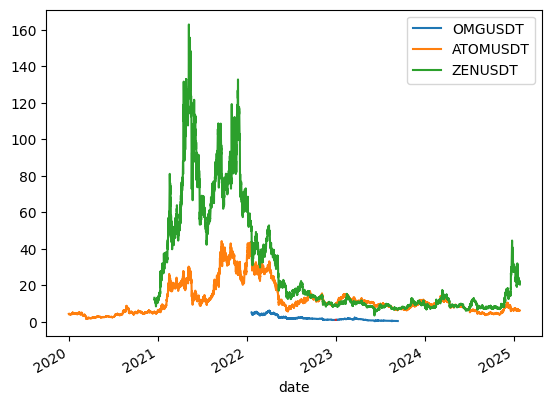

In [15]:
px_ex_data = px_close[["OMGUSDT", "ATOMUSDT", "ZENUSDT"]]
fixed_params = results.params.loc["2023-01-01"]

est = fixed_params["const"] + fixed_params["ATOMUSDT"] * px_ex_data["ATOMUSDT"] + fixed_params["ZENUSDT"] * px_ex_data["ZENUSDT"]

px_ex_data.plot()
est.plot()

<Axes: xlabel='date'>

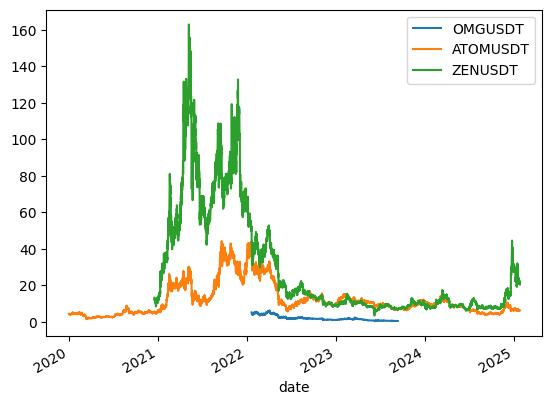

In [16]:
px_ex_data.plot()

In [17]:
# 'OMGUSDT': ('ATOMUSDT', 'ZENUSDT')

beta_coeffs = results.params[["ATOMUSDT", "ZENUSDT"]][:]
beta_coeffs

,ATOMUSDT,ZENUSDT
date,,
2020-01-01 00:00:00,NaN,NaN
2020-01-01 04:00:00,NaN,NaN
2020-01-01 08:00:00,NaN,NaN
2020-01-01 12:00:00,NaN,NaN
2020-01-01 16:00:00,NaN,NaN
...,...,...
2025-01-24 20:00:00,NaN,NaN
2025-01-25 00:00:00,NaN,NaN
2025-01-25 04:00:00,NaN,NaN


In [18]:
alpha_coeffs = results.params[["const"]][:]
alpha_coeffs.rename({"const": "OMGUSDT"}, axis=1, inplace=True)
alpha_coeffs

,OMGUSDT
date,
2020-01-01 00:00:00,NaN
2020-01-01 04:00:00,NaN
2020-01-01 08:00:00,NaN
2020-01-01 12:00:00,NaN
2020-01-01 16:00:00,NaN
...,...
2025-01-24 20:00:00,NaN
2025-01-25 00:00:00,NaN
2025-01-25 04:00:00,NaN


In [19]:
(px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).loc["2023-01-01"]

,ATOMUSDT,ZENUSDT
date,,
2023-01-01 00:00:00,-0.058213,0.985880
2023-01-01 04:00:00,-0.079179,1.004862
2023-01-01 08:00:00,-0.117010,1.031334
2023-01-01 12:00:00,-0.138058,1.044527
2023-01-01 16:00:00,-0.148609,1.055417
2023-01-01 20:00:00,-0.173065,1.068026


In [20]:
(px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).sum(axis=1).loc["2023-01-01"]

date
2023-01-01 00:00:00    0.927667
2023-01-01 04:00:00    0.925683
2023-01-01 08:00:00    0.914324
2023-01-01 12:00:00    0.906469
2023-01-01 16:00:00    0.906808
2023-01-01 20:00:00    0.894962
dtype: float64

In [21]:
alpha_coeffs["OMGUSDT"].loc["2023-01-01"]

date
2023-01-01 00:00:00    0.126057
2023-01-01 04:00:00    0.134856
2023-01-01 08:00:00    0.150978
2023-01-01 12:00:00    0.160011
2023-01-01 16:00:00    0.163070
2023-01-01 20:00:00    0.174365
Name: OMGUSDT, dtype: float64

In [22]:
0.7947706861516188 + 0.2693810611222034

1.0641517472738222

In [23]:
((px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).sum(axis=1) + alpha_coeffs["OMGUSDT"]).loc["2023-01-01"]

date
2023-01-01 00:00:00    1.053724
2023-01-01 04:00:00    1.060539
2023-01-01 08:00:00    1.065302
2023-01-01 12:00:00    1.066481
2023-01-01 16:00:00    1.069878
2023-01-01 20:00:00    1.069326
dtype: float64

In [24]:
px_close[["ATOMUSDT", "ZENUSDT"]].loc["2023-01-01"]

,ATOMUSDT,ZENUSDT
date,,
2023-01-01 00:00:00,9.380,9.213
2023-01-01 04:00:00,9.392,9.283
2023-01-01 08:00:00,9.414,9.337
2023-01-01 12:00:00,9.414,9.353
2023-01-01 16:00:00,9.453,9.392
2023-01-01 20:00:00,9.445,9.392


In [25]:
beta_coeffs[["ATOMUSDT", "ZENUSDT"]].loc["2023-01-01"]

,ATOMUSDT,ZENUSDT
date,,
2023-01-01 00:00:00,-0.006206,0.107010
2023-01-01 04:00:00,-0.008431,0.108248
2023-01-01 08:00:00,-0.012429,0.110457
2023-01-01 12:00:00,-0.014665,0.111678
2023-01-01 16:00:00,-0.015721,0.112374
2023-01-01 20:00:00,-0.018323,0.113717


In [26]:
estimations = (px_close[["ATOMUSDT", "ZENUSDT"]] * beta_coeffs).sum(axis=1) + alpha_coeffs["OMGUSDT"]
residuals = px_close["OMGUSDT"] - estimations
residuals.loc["2023-01-01"]

date
2023-01-01 00:00:00   -0.018724
2023-01-01 04:00:00   -0.031539
2023-01-01 08:00:00   -0.036302
2023-01-01 12:00:00   -0.037481
2023-01-01 16:00:00   -0.040878
2023-01-01 20:00:00   -0.040326
dtype: float64

In [27]:
residuals.loc["2023-01-01"]

date
2023-01-01 00:00:00   -0.018724
2023-01-01 04:00:00   -0.031539
2023-01-01 08:00:00   -0.036302
2023-01-01 12:00:00   -0.037481
2023-01-01 16:00:00   -0.040878
2023-01-01 20:00:00   -0.040326
dtype: float64

In [28]:
def get_triple_residuals(dependent_coin, independent_coin_1, independent_coin_2, OLS_results, px_close):
    beta_coeffs = OLS_results.params[[independent_coin_1, independent_coin_2]][:]
    alpha_coeff = OLS_results.params["const"]
    estimations = (px_close[[independent_coin_1, independent_coin_2]] * beta_coeffs).sum(axis=1) + alpha_coeff
    return px_close[dependent_coin] - estimations

residuals = get_triple_residuals("OMGUSDT", "ATOMUSDT", "ZENUSDT", results, px_close)
residuals

date
2020-01-01 00:00:00   NaN
2020-01-01 04:00:00   NaN
2020-01-01 08:00:00   NaN
2020-01-01 12:00:00   NaN
2020-01-01 16:00:00   NaN
                       ..
2025-01-24 20:00:00   NaN
2025-01-25 00:00:00   NaN
2025-01-25 04:00:00   NaN
2025-01-25 08:00:00   NaN
2025-01-25 12:00:00   NaN
Length: 11104, dtype: float64

In [29]:
def get_all_triples_alpha_beta_residuals(px_close, selected_triples, interval, min_num_observations):
    beta_dict = dict()
    alpha_dict = dict()
    residual_dict = dict()
    for dependent_coin, (independent_coin_1, independent_coin_2) in selected_triples.items():
        results = get_triples_rolling_alpha_beta(dependent_coin, independent_coin_1, independent_coin_2,
                                                 interval, min_num_observations, px_close)
        beta_dict[independent_coin_1] = results.params[independent_coin_1]
        beta_dict[independent_coin_2] = results.params[independent_coin_2]
        alpha_dict[dependent_coin] = results.params["const"]
        
        residuals = get_triple_residuals(dependent_coin, independent_coin_1, independent_coin_2,
                                         results, px_close)
        residual_dict[dependent_coin] = residuals
        
    beta_df = pd.DataFrame(beta_dict, columns=px_close.columns)
    alpha_df = pd.DataFrame(alpha_dict, columns=px_close.columns)
    residuals_df = pd.DataFrame(residual_dict, columns=px_close.columns)
    
    return alpha_df, beta_df, residuals_df

In [30]:
alpha_df, beta_df, residuals_df = get_all_triples_alpha_beta_residuals(
    px_close, selected_triples, look_back_window_size, look_back_min_periods)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [31]:
alpha_df

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,NaN,NaN,NaN,NaN,NaN,-0.040604,NaN,NaN,NaN,NaN,...,NaN,0.031818,-0.246749,NaN,NaN,NaN,NaN,NaN,-0.842367,NaN
2025-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,-0.039727,NaN,NaN,NaN,NaN,...,NaN,0.033486,-0.247894,NaN,NaN,NaN,NaN,NaN,-0.867117,NaN
2025-01-25 04:00:00,NaN,NaN,NaN,NaN,NaN,-0.037289,NaN,NaN,NaN,NaN,...,NaN,0.033831,-0.250254,NaN,NaN,NaN,NaN,NaN,-0.872273,NaN


In [32]:
beta_df

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,-0.000002,0.015268,NaN,0.000760,NaN,NaN,0.002718,10.736291,NaN,NaN,...,2.076494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-25 00:00:00,-0.000002,0.015260,NaN,0.000762,NaN,NaN,0.002716,10.739323,NaN,NaN,...,2.073443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-25 04:00:00,-0.000002,0.015308,NaN,0.000764,NaN,NaN,0.002709,10.727804,NaN,NaN,...,2.085155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
residuals_df

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,NaN,NaN,NaN,NaN,NaN,0.020725,NaN,NaN,NaN,NaN,...,NaN,0.003371,-0.027769,NaN,NaN,NaN,NaN,NaN,7.190053,NaN
2025-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,0.003594,NaN,NaN,NaN,NaN,...,NaN,-0.009102,-0.016489,NaN,NaN,NaN,NaN,NaN,7.275027,NaN
2025-01-25 04:00:00,NaN,NaN,NaN,NaN,NaN,0.016367,NaN,NaN,NaN,NaN,...,NaN,-0.005960,-0.018972,NaN,NaN,NaN,NaN,NaN,7.213598,NaN


## Get z-Scores

In [34]:
# look_back_window_size, look_back_min_periods

def get_triple_z_scores(residuals, interval, look_back):
    rolling_res_means = residuals.rolling(window=look_back_window_size, min_periods=look_back_min_periods).mean()
    rolling_res_stds = residuals.rolling(window=look_back_window_size, min_periods=look_back_min_periods).std()

    return (residuals - rolling_res_means) / rolling_res_stds

z_scores = get_triple_z_scores(residuals, look_back_window_size, look_back_min_periods)
z_scores

date
2020-01-01 00:00:00   NaN
2020-01-01 04:00:00   NaN
2020-01-01 08:00:00   NaN
2020-01-01 12:00:00   NaN
2020-01-01 16:00:00   NaN
                       ..
2025-01-24 20:00:00   NaN
2025-01-25 00:00:00   NaN
2025-01-25 04:00:00   NaN
2025-01-25 08:00:00   NaN
2025-01-25 12:00:00   NaN
Length: 11104, dtype: float64

In [35]:
def get_all_triples_z_scores(selected_triples, residuals_df, interval, look_back):
    z_scores_df = pd.DataFrame(0.0, columns=residuals_df.columns, index=residuals_df.index)
    for dependent_coin, (independent_coin_1, independent_coin_2) in selected_triples.items():
        z_scores_df[dependent_coin] = get_triple_z_scores(
            residuals_df[dependent_coin], interval, look_back)
    return z_scores_df

z_scores_df = get_all_triples_z_scores(selected_triples, residuals_df, look_back_window_size,
                                       look_back_min_periods)
z_scores_df

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0
2020-01-01 08:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0
2020-01-01 12:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0
2020-01-01 16:00:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,0.0,0.0,0.0,0.0,0.0,0.593021,0.0,0.0,0.0,0.0,...,0.0,1.002534,1.198099,0.0,NaN,0.0,0.0,0.0,1.041595,0.0
2025-01-25 00:00:00,0.0,0.0,0.0,0.0,0.0,0.160204,0.0,0.0,0.0,0.0,...,0.0,-0.698169,1.298877,0.0,NaN,0.0,0.0,0.0,1.053743,0.0
2025-01-25 04:00:00,0.0,0.0,0.0,0.0,0.0,0.485076,0.0,0.0,0.0,0.0,...,0.0,-0.255804,1.273069,0.0,NaN,0.0,0.0,0.0,1.024983,0.0


## Get Holdings

In [36]:
import numpy as np

threshold = 1.0
strategy_holdings = pd.DataFrame(0.0, index=z_scores.index, columns=px_close.columns)

def set_triple_strategy_holdings(dependent_coin, independent_coin_1, independent_coin_2, strategy_holdings,
                                 z_scores_df, threshold, beta_coeffs):
    strategy_holdings.loc[z_scores_df[dependent_coin] > threshold, dependent_coin] = -1.0
    strategy_holdings.loc[z_scores_df[dependent_coin] > threshold, independent_coin_1] = beta_coeffs.loc[z_scores_df[dependent_coin] > threshold, independent_coin_1]
    strategy_holdings.loc[z_scores_df[dependent_coin] > threshold, independent_coin_2] = beta_coeffs.loc[z_scores_df[dependent_coin] > threshold, independent_coin_2]

    strategy_holdings.loc[z_scores_df[dependent_coin] < -threshold, dependent_coin] = 1.0
    strategy_holdings.loc[z_scores_df[dependent_coin] < -threshold, independent_coin_1] = -beta_coeffs.loc[z_scores_df[dependent_coin] < -threshold, independent_coin_1]
    strategy_holdings.loc[z_scores_df[dependent_coin] < -threshold, independent_coin_2] = -beta_coeffs.loc[z_scores_df[dependent_coin] < -threshold, independent_coin_2]


set_triple_strategy_holdings("OMGUSDT", "ATOMUSDT", "ZENUSDT", strategy_holdings, z_scores_df, threshold,
                             beta_coeffs)
strategy_holdings = strategy_holdings.divide(strategy_holdings.abs().sum(axis=1), axis=0)
# strategy_holdings.abs().loc["2022-03-01":"2022-04-01"][["OMGUSDT", "ATOMUSDT", "ZENUSDT"]].sum(axis=1)
strategy_holdings.loc["2022-03-01":"2022-04-01"][["OMGUSDT", "ATOMUSDT", "ZENUSDT"]]

,OMGUSDT,ATOMUSDT,ZENUSDT
date,,,
2022-03-01 00:00:00,0.896733,-0.016560,-0.086706
2022-03-01 04:00:00,0.898596,-0.013236,-0.088167
2022-03-01 08:00:00,NaN,NaN,NaN
2022-03-01 12:00:00,NaN,NaN,NaN
2022-03-01 16:00:00,NaN,NaN,NaN
...,...,...,...
2022-04-01 04:00:00,-0.878486,0.020656,0.100858
2022-04-01 08:00:00,-0.878961,0.019526,0.101513
2022-04-01 12:00:00,-0.878873,0.019111,0.102016


In [37]:
beta_coeffs.loc["2022-03-10"]

,ATOMUSDT,ZENUSDT
date,,
2022-03-10 00:00:00,-0.009992,0.105625
2022-03-10 04:00:00,-0.010000,0.104794
2022-03-10 08:00:00,-0.010245,0.104572
2022-03-10 12:00:00,-0.010313,0.104357
2022-03-10 16:00:00,-0.010290,0.104134
2022-03-10 20:00:00,-0.009663,0.103561


In [38]:
def get_all_triples_strategy_holdings(selected_triples, z_scores_df, beta_df, threshold):
    strategy_holdings_df = pd.DataFrame(0.0, columns=z_scores_df.columns, index=z_scores.index)
    
    for dependent_coin, (independent_coin_1, independent_coin_2) in selected_triples.items():
        set_triple_strategy_holdings(dependent_coin, independent_coin_1, independent_coin_2,
                                     strategy_holdings_df, z_scores_df, threshold, beta_df)
    
    total_holdings = strategy_holdings_df.abs().sum(axis=1)
    strategy_holdings_df = strategy_holdings_df.divide(total_holdings, axis=0)
    
    strategy_holdings_df = strategy_holdings_df.shift()
    strategy_holdings_df.fillna(0.0, inplace=True)
    return strategy_holdings_df

In [39]:
get_all_triples_strategy_holdings(selected_triples, z_scores_df, beta_df, 1.0)

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-01-01 04:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-01-01 08:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-01-01 12:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2020-01-01 16:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,-0.040026,0.0,0.0,0.0,0.0,...,0.082428,0.000000,-0.040026,0.0,0.0,0.0,0.0,0.0,-0.040026,0.0
2025-01-25 00:00:00,-7.672223e-08,0.0,0.0,0.000032,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,-0.042045,-0.042045,0.0,0.0,0.0,0.0,0.0,-0.042045,0.0
2025-01-25 04:00:00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.043719,0.0,0.0,0.0,0.0,0.0,-0.043719,0.0


## Strategy Holdings From Price Data

Combine the functions above to determine the holdings over time.

In [40]:
def get_strategy_holdings_from_price_data(px_close, interval, min_num_observations, threshold, use_min_corr):
    selected_triples = get_selected_triples(px_close, use_min_corr)
    alpha_df, beta_df, residuals_df = get_all_triples_alpha_beta_residuals(
        px_close, selected_triples, interval, min_num_observations)
    z_scores_df = get_all_triples_z_scores(selected_triples, residuals_df, interval, min_num_observations)
    return get_all_triples_strategy_holdings(selected_triples, z_scores_df, beta_df, threshold)

In [41]:
strategy_holdings_df = get_strategy_holdings_from_price_data(px_close, look_back_window_size,
                                                             look_back_min_periods, 2.0, True)
strategy_holdings_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 08:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 12:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 16:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24 20:00:00,0.0,-0.000529,0.0,-0.000997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-25 00:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-01-25 04:00:00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculate Net Returns

In [42]:
# We assume that strategy_holdings_df has already been shifted forward to avoid look-ahead bias.
def get_net_returns(px_close, strategy_holdings_df):
    gross_ret = (px_close * strategy_holdings_df).sum(axis=1)
    
    turnover = (strategy_holdings_df.fillna(0) - strategy_holdings_df.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

In [43]:
net_returns = get_net_returns(px_close, strategy_holdings_df)
net_returns

date
2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000000
2020-01-01 12:00:00    0.000000
2020-01-01 16:00:00    0.000000
                         ...   
2025-01-24 20:00:00   -0.956425
2025-01-25 00:00:00   -0.002000
2025-01-25 04:00:00    0.000000
2025-01-25 08:00:00    0.000000
2025-01-25 12:00:00    0.000000
Length: 11104, dtype: float64

<Axes: xlabel='date'>

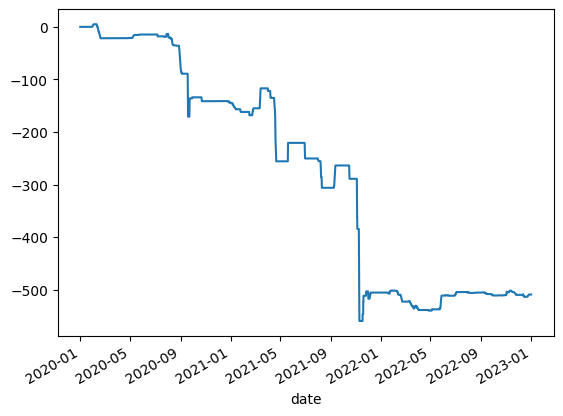

In [44]:
# in_sample_end = pd.to_datetime("2022-12-31")
# out_sample_start = pd.to_datetime("2023-01-01")

net_returns[:in_sample_end].cumsum().plot()

<Axes: xlabel='date'>

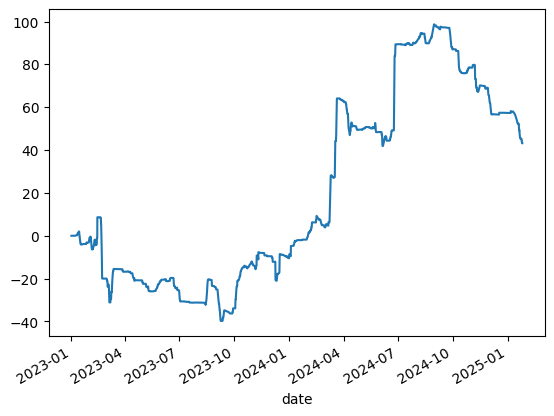

In [45]:
net_returns[out_sample_start:].cumsum().plot()

In [50]:
net_returns[out_sample_start:].mean() / net_returns[out_sample_start:].std() * np.sqrt(yearly_periods)

1.001453576942183